In [38]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [40]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [41]:
import os
import pandas as pd

os.getcwd()

'/home/piai/다운로드'

In [42]:
os.chdir('/home/piai/다운로드')

In [43]:
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [46]:
df_raw = pd.read_csv('car_final.csv',encoding='euc-kr')
df_raw.drop("Brand_encoded",inplace = True,axis = 1)
df_raw.head()

,Location,Price,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Indian_Brand,Age,Fuel_Type_Petrol,Transmission_Manual
0,6,19162.00,41000,1,19.67,1582.0,126.20,5.0,1,5,0,1
1,5,6898.32,46000,1,18.20,1199.0,88.70,5.0,1,9,1,1
2,5,9197.76,87000,1,20.77,1248.0,88.76,7.0,0,8,0,1
3,1,27194.71,40670,2,15.20,1968.0,140.80,5.0,1,7,0,0
4,0,5365.36,86999,1,23.08,1461.0,63.10,5.0,1,7,0,1


# < 변수 확인 >

### Location	int64	차량이 위치한 지역 (숫자로 인코딩됨)
### Price	float64	차량 가격 (예측할 종속변수)
### Kilometers_Driven	int64	주행 거리 (km)
### Owner_Type	int64	소유자 유형 (1=첫 번째 소유주, 2=두 번째 소유주 등)
### Mileage	float64	연비 (km/L)
### Engine	float64	엔진 배기량 (cc)
### Power	float64	차량 출력 (마력, bhp)
### Seats	float64	좌석 수
### Indian_Brand	int64	인도 브랜드 여부 (1=인도 브랜드, 0=비인도 브랜드)
### Age	int64	차량 연식 (나이)
### Fuel_Type_Petrol	int64	가솔린 차량 여부 (1=가솔린, 0=그 외)
### Transmission_Manual	int64	수동 변속기 여부 (1=수동, 0=자동)

In [47]:
# 요약통계량
df_raw.describe().round(3)

,Location,Price,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Indian_Brand,Age,Fuel_Type_Petrol,Transmission_Manual
count,7043.000,7043.000,7043.000,7043.000,7043.000,7043.00,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000
mean,5.211,14370.401,57187.751,1.198,18.325,1608.29,111.973,5.286,0.726,6.559,0.461,0.718
std,3.209,16217.211,33880.195,0.451,4.052,556.12,49.213,0.803,0.446,3.157,0.498,0.450
min,0.000,674.500,171.000,1.000,8.200,624.00,34.200,2.000,0.000,1.000,0.000,0.000
25%,2.000,5442.010,33796.500,1.000,15.400,1198.00,78.900,5.000,0.000,4.000,0.000,0.000
50%,6.000,8753.200,53000.000,1.000,18.200,1493.00,98.600,5.000,1.000,6.000,0.000,1.000
75%,8.000,15329.600,73000.000,1.000,21.100,1968.00,138.030,5.000,1.000,8.000,1.000,1.000
max,10.000,148804.430,300000.000,4.000,28.400,3696.00,444.000,10.000,1.000,19.000,1.000,1.000


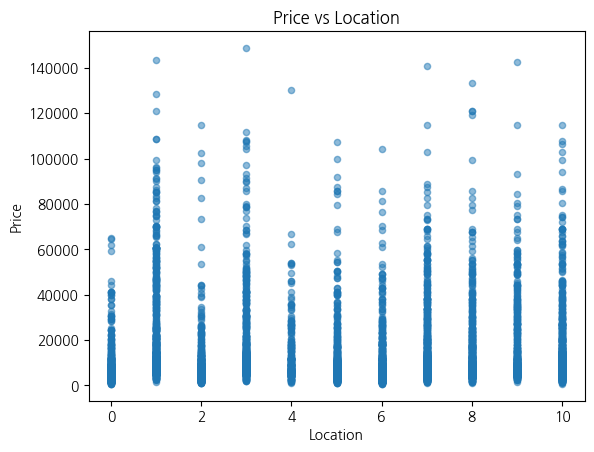

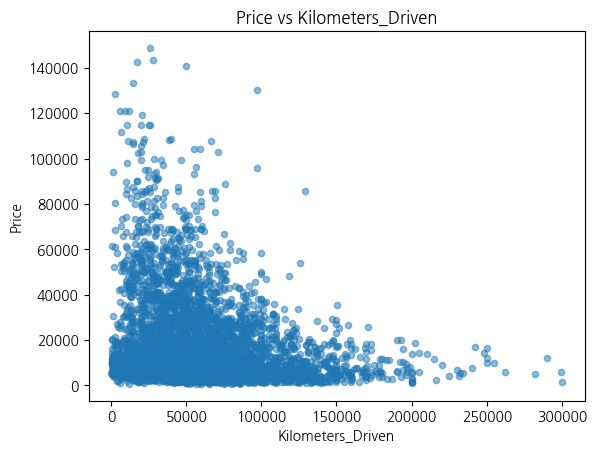

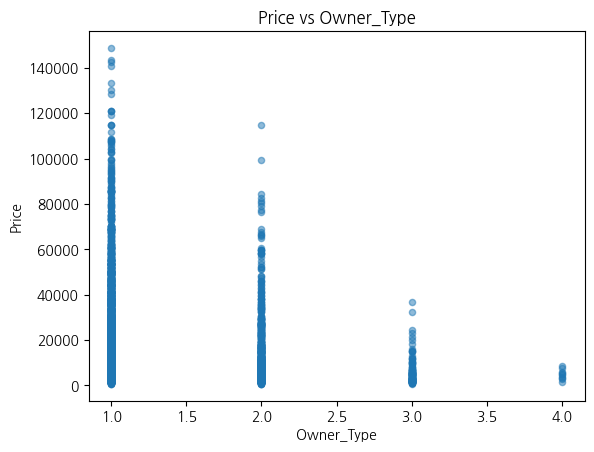

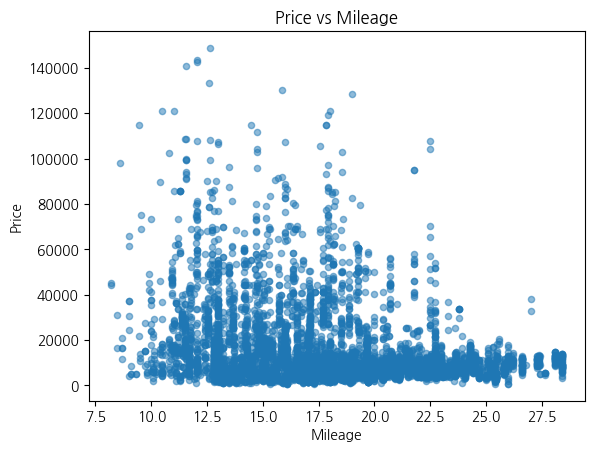

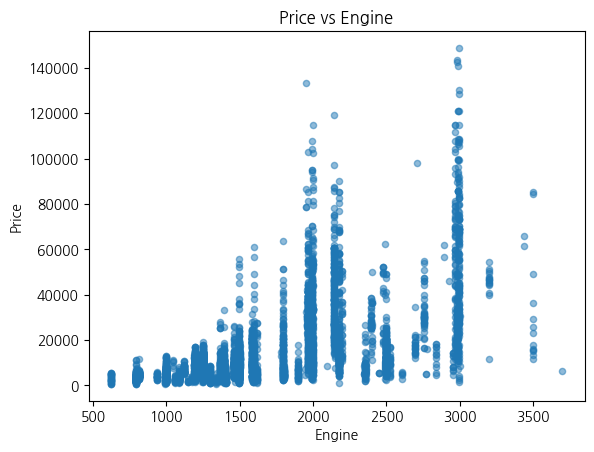

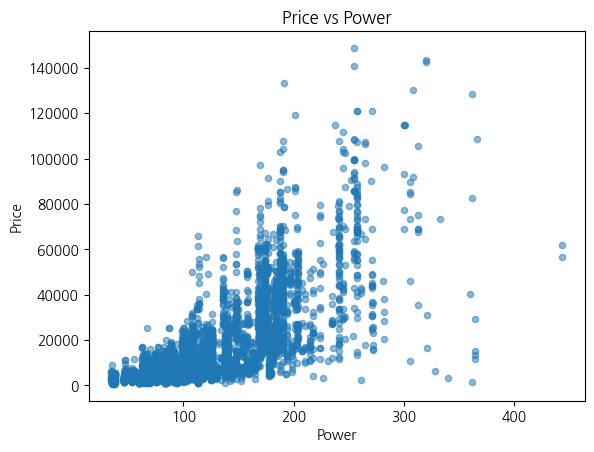

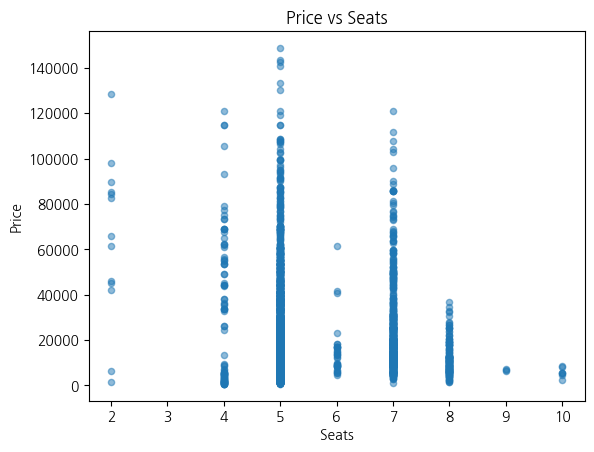

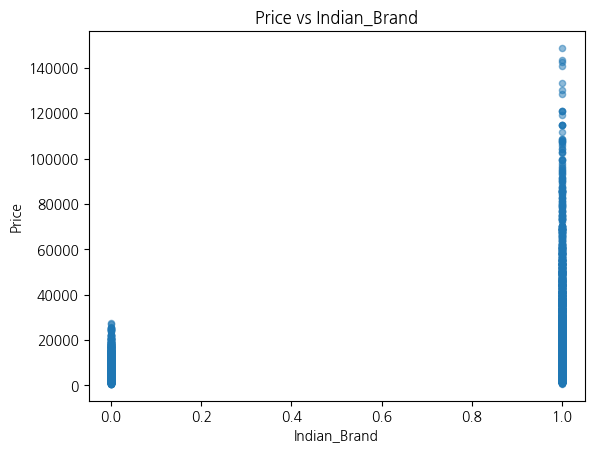

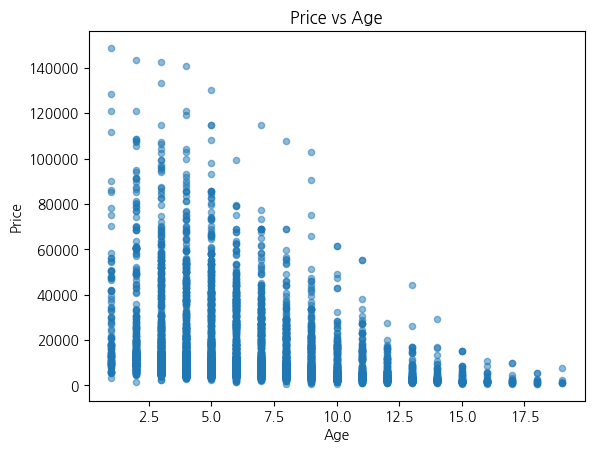

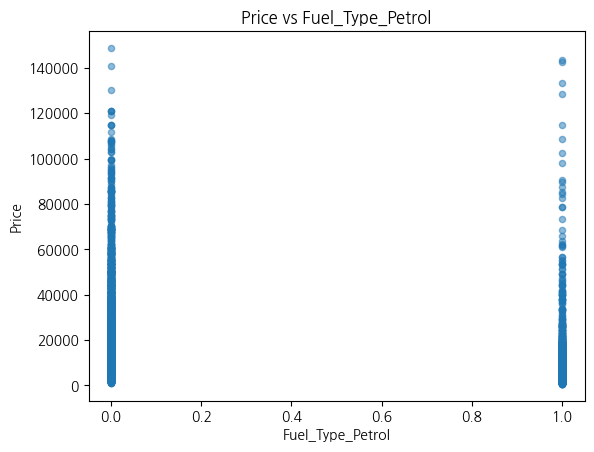

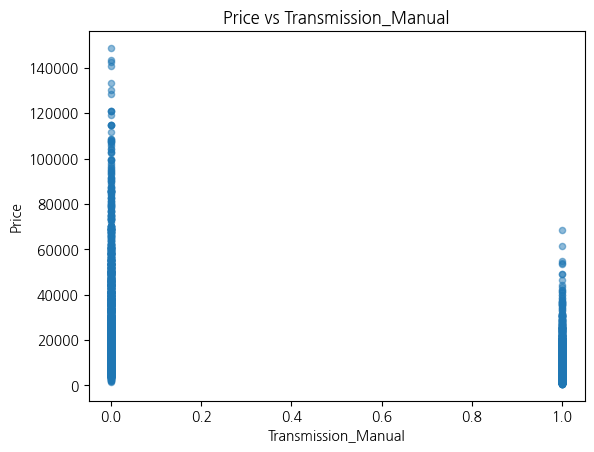

In [48]:
import matplotlib.pyplot as plt

# 모든 설명변수 확인
features = df_raw.columns.tolist()
features.remove("Price")  # 목표변수(Price) 제거

# 각 설명변수에 대해 산점도 그리기
for feature in features:
    df_raw.plot.scatter(x=feature, y="Price", alpha=0.5)
    plt.title(f"Price vs {feature}")
    plt.show()

In [49]:
df_raw.corr(method = "pearson").round(3)

,Location,Price,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Indian_Brand,Age,Fuel_Type_Petrol,Transmission_Manual
Location,1.000,0.008,0.030,0.076,-0.122,0.099,0.095,0.039,0.049,0.147,0.017,-0.092
Price,0.008,1.000,-0.179,-0.112,-0.305,0.614,0.748,0.074,0.247,-0.326,-0.333,-0.587
Kilometers_Driven,0.030,-0.179,1.000,0.247,-0.169,0.202,0.016,0.238,-0.009,0.495,-0.259,0.120
Owner_Type,0.076,-0.112,0.247,1.000,-0.155,0.052,0.019,0.019,0.015,0.389,0.048,0.004
Mileage,-0.122,-0.305,-0.169,-0.155,1.000,-0.647,-0.544,-0.360,-0.276,-0.304,-0.132,0.348
Engine,0.099,0.614,0.202,0.052,-0.647,1.000,0.838,0.448,0.295,0.057,-0.456,-0.484
Power,0.095,0.748,0.016,0.019,-0.544,0.838,1.000,0.120,0.354,-0.023,-0.310,-0.648
Seats,0.039,0.074,0.238,0.019,-0.360,0.448,0.120,1.000,-0.137,-0.008,-0.302,0.078
Indian_Brand,0.049,0.247,-0.009,0.015,-0.276,0.295,0.354,-0.137,1.000,0.029,-0.023,-0.271
Age,0.147,-0.326,0.495,0.389,-0.304,0.057,-0.023,-0.008,0.029,1.000,0.120,0.099


In [50]:
# 처음 학습
reg_model = smf.ols(formula = "Price ~ Location+Kilometers_Driven+Owner_Type+Mileage+Engine+Power+Seats+Indian_Brand+Age+Fuel_Type_Petrol+Transmission_Manual", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1351.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:41:01   Log-Likelihood:                -74266.
No. Observations:                7043   AIC:                         1.486e+05
Df Residuals:                    7031   BIC:                         1.486e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             2.01e+04   2

R-squared = 0.679, Adj. R-squared = 0.678: 설명력이 **67.9%**로 중간 정도의 성능.


F-statistic: 1351, Prob (F-statistic): 0.00: 모델 전체적으로 유의미함.

Owner_Type는 p-value = 0.981로 유의미하지 않음 → 제거 가능.

Condition Number = 1.07e+06 → 다중공선성(Multicollinearity) 문제 가능성 있음.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 사용 변수 선택 (Owner_Type 제거)
selected_features = ["Location", "Kilometers_Driven", "Mileage", "Engine", "Power",
                     "Seats", "Indian_Brand", "Age", "Fuel_Type_Petrol", "Transmission_Manual"]

# VIF 계산
X = df_raw[selected_features]
X = sm.add_constant(X)  # Intercept 추가
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
display(vif_data.round(2))

,Feature,VIF
0,const,365.20
1,Location,1.04
2,Kilometers_Driven,1.64
3,Mileage,3.53
4,Engine,8.34
5,Power,5.68
6,Seats,2.11
7,Indian_Brand,1.25
8,Age,1.68
9,Fuel_Type_Petrol,2.40


다중공선성 문제는 없음.

단!!

Engine/8.34/약간 높은 값, 제거 고려 가능

Power/5.68/다소 높은 값, Engine과 중복 가능성 있음

In [52]:
# @title 기본 제목 텍스트
reg_model = smf.ols(formula = "Price ~ Location+Kilometers_Driven+Mileage+Engine+Power+Seats+Indian_Brand+Age+Fuel_Type_Petrol+Transmission_Manual", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1487.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:41:01   Log-Likelihood:                -74266.
No. Observations:                7043   AIC:                         1.486e+05
Df Residuals:                    7032   BIC:                         1.486e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.999e+04   2

owner type제거 후에도
R-squared:                       0.679가 유지되므로 필요 없는 변수임!!

In [53]:
# 엔진 제거
reg_model = smf.ols(formula = "Price ~ Location+Kilometers_Driven+Mileage+Power+Seats+Indian_Brand+Age+Fuel_Type_Petrol+Transmission_Manual", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1652.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:41:01   Log-Likelihood:                -74267.
No. Observations:                7043   AIC:                         1.486e+05
Df Residuals:                    7033   BIC:                         1.486e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.048e+04   2

R-squared	0.679	0.678	동일

Adj. R-squared	0.670	0.669	0.001 감소 (거의 영향 없음)

F-statistic	1449	1609	증가 (모델이 더 강력해짐)

AIC	151500	151500	동일
BIC	151600	151600	동일

Condition Number	1.06e+06	1.05e+06	다소 감소 (다중공선성 완화)

✅ 최종 결론
✔ 다중공선성이 줄었고, 모델의 성능이 동일하게 유지되었으므로 최적화 성공!

✔ 추가적으로 더 제거할 변수는 없고, 이 상태에서 모델을 활용하면 충분히 의미 있는 결과를 낼 수 있음.

✔ 이제 회귀 모델을 기반으로 예측을 진행하거나, 랜덤포레스트/XGBoost 같은 비선형 모델과 비교해볼 수도 있음.

In [54]:
# 시트와 인도비인도제거
reg_model = smf.ols(formula = "Price ~ Location+Kilometers_Driven+Mileage+Power+Seats+Indian_Brand+Age+Fuel_Type_Petrol+Transmission_Manual", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1652.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:41:01   Log-Likelihood:                -74267.
No. Observations:                7043   AIC:                         1.486e+05
Df Residuals:                    7033   BIC:                         1.486e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.048e+04   2

0.678유지됨

In [55]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. 데이터 준비
features = ["Location", "Kilometers_Driven", "Mileage", "Power", "Seats",
            "Indian_Brand", "Age", "Fuel_Type_Petrol", "Transmission_Manual"]

X = df_raw[features]
y = df_raw["Price"]

# 2. 데이터 표준화 (규제 회귀에서는 필수)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 모델 리스트 (OLS, Ridge, Lasso, ElasticNet)
models = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(alpha=1),  # L2 규제
    "Lasso": Lasso(alpha=1),  # L1 규제
    "ElasticNet": ElasticNet(alpha=1, l1_ratio=1)  # L1 50%, L2 50%
}

# 4. 결과 저장용 DataFrame
results = []

# 5. 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    results.append({"Model": name, "MSE": mse, "R-squared": r2})

# 6. DataFrame 변환 후 출력
df_results = pd.DataFrame(results)
df_results

,Model,MSE,R-squared
0,OLS,8.444762e+07,0.678858
1,Ridge,8.444762e+07,0.678858
2,Lasso,8.444763e+07,0.678858
3,ElasticNet,8.444763e+07,0.678858


✅ 모든 모델의 성능이 동일 → 규제(Ridge, Lasso, ElasticNet)의 효과가 전혀 나타나지 않음.

즉, 현재 데이터에서는 규제 회귀가 큰 차이를 만들지 못하고 있음.

이전에 다중공산성을 줄이고 불필요 변수를 없에서 규제의 효과가 없음.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. 데이터 준비
features = ["Location", "Kilometers_Driven", "Mileage", "Power", "Seats",
            "Indian_Brand", "Age", "Fuel_Type_Petrol", "Transmission_Manual"]

X = df_raw[features]
y = df_raw["Price"]

# 2. Train-Validation 데이터 분할 (train 70%, validation 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1234)

# 3. 데이터 표준화 (규제 회귀에서는 필수)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 4. 모델 리스트 (OLS, Ridge, Lasso, ElasticNet)
models = {
    "OLS": LinearRegression(),
    "Ridge (α=1.0)": Ridge(alpha=1.0),
    "Lasso (α=1.0)": Lasso(alpha=1.0),
    "ElasticNet (α=1.0)": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# 5. 결과 저장용 리스트
results = []

# 6. 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # 학습
    y_train_pred = model.predict(X_train_scaled)  # 훈련셋 예측
    y_valid_pred = model.predict(X_valid_scaled)  # 검증셋 예측

    # 평가 지표 계산
    train_mse = mean_squared_error(y_train, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)

    # 결과 저장
    results.append({"Model": name, "Train MSE": train_mse, "Valid MSE": valid_mse,
                    "Train R-squared": train_r2, "Valid R-squared": valid_r2})

# 7. DataFrame 변환 후 출력
df_results = pd.DataFrame(results)
df_results

,Model,Train MSE,Valid MSE,Train R-squared,Valid R-squared
0,OLS,8.368082e+07,8.636153e+07,0.684141,0.665536
1,Ridge (α=1.0),8.368083e+07,8.635921e+07,0.684141,0.665545
2,Lasso (α=1.0),8.368084e+07,8.636060e+07,0.684141,0.665539
3,ElasticNet (α=1.0),9.504715e+07,9.550918e+07,0.641238,0.630108


In [57]:
# OLS 모델 학습
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)  # 상수항 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()

# 변수 중요도 (회귀 계수 절댓값 기준 정렬)
coef_df = pd.DataFrame({"Feature": ["Intercept"] + features, "Coefficient": ols_model.params})
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)  # 중요도 높은 순 정렬
coef_df

,Feature,Coefficient,Abs_Coefficient
const,Intercept,14511.495995,14511.495995
x4,Power,9593.696345,9593.696345
x7,Age,-4174.000265,4174.000265
x8,Fuel_Type_Petrol,-2448.781029,2448.781029
x9,Transmission_Manual,-2029.777019,2029.777019
x2,Kilometers_Driven,-1476.109442,1476.109442
x3,Mileage,-1210.568445,1210.568445
x5,Seats,-606.233555,606.233555
x1,Location,-337.106262,337.106262
x6,Indian_Brand,-311.693649,311.693649


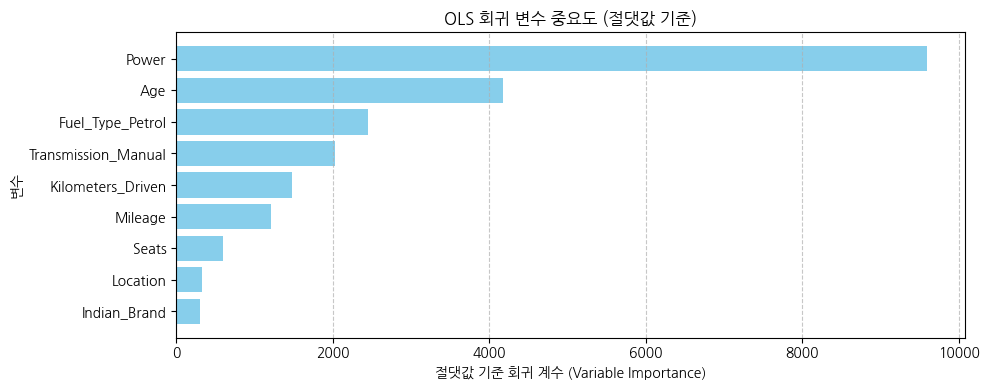

In [60]:
# intercept 항 제외
coef_df = coef_df[coef_df["Feature"] != "Intercept"]

# 절댓값 기준으로 정렬
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

# 가로 막대그래프 그리기
plt.figure(figsize=(10, max(4, len(coef_df) * 0.4)))
plt.barh(coef_df["Feature"], coef_df["Abs_Coefficient"], color="skyblue")
plt.xlabel("절댓값 기준 회귀 계수 (Variable Importance)")
plt.ylabel("변수")
plt.title("OLS 회귀 변수 중요도 (절댓값 기준)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [61]:
# coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

# # 가로 막대그래프 그리기
# plt.figure(figsize=(10, max(4, len(coef_df) * 0.4)))
# plt.barh(coef_df["Feature"], coef_df["Abs_Coefficient"], color="skyblue")
# plt.xlabel("절댓값 기준 회귀 계수 (Variable Importance)")
# plt.ylabel("변수")
# plt.title("OLS 회귀 변수 중요도 (절댓값 기준)")
# plt.gca().invert_yaxis()
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

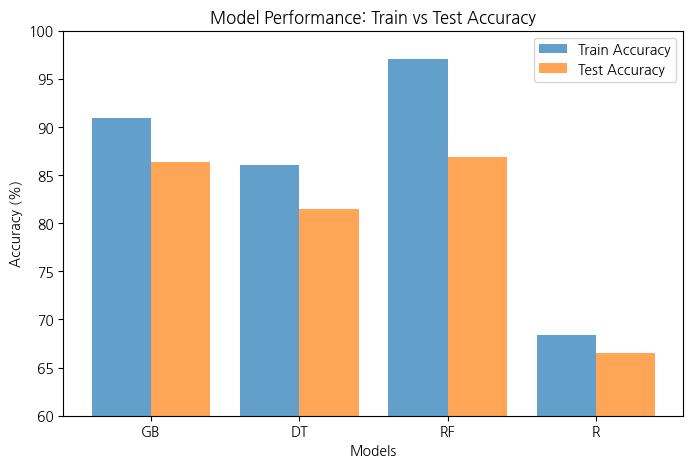

In [62]:
# 필요한 라이브러리 다시 로드
import matplotlib.pyplot as plt
import numpy as np

# 모델 및 성능 데이터
models = ["GB", "DT", "RF", "R"]
train_scores = [90.9, 86.1, 97.1, 68.4]
test_scores = [86.4, 81.5, 86.9, 66.5]

# 그래프 그리기
x = np.arange(len(models))  # x축 위치
width = 0.4  # 막대 너비

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, train_scores, width, label="Train Accuracy", alpha=0.7)
ax.bar(x + width/2, test_scores, width, label="Test Accuracy", alpha=0.7)

# 레이블 추가
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Model Performance: Train vs Test Accuracy")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# 그래프 표시
plt.ylim(60, 100)  # y축 범위 설정
plt.show()